In [5]:
import pandas as pd

# Raw link of the CSV file
url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(url)


In [6]:
df.sample(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
246,15638003,Female,35,50000,0
346,15646936,Male,53,72000,1
93,15699284,Female,29,28000,0


In [7]:
df = df.iloc[:,2:]
df.sample(3)

,Age,EstimatedSalary,Purchased
380,42,64000,0
130,31,58000,0
234,38,112000,0


In [8]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Density'>

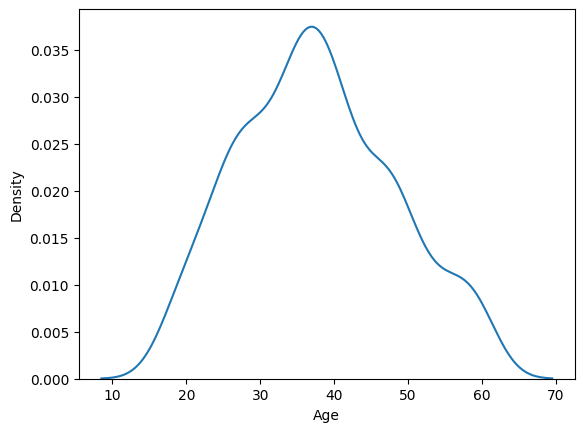

In [9]:
sns.kdeplot(df["Age"])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

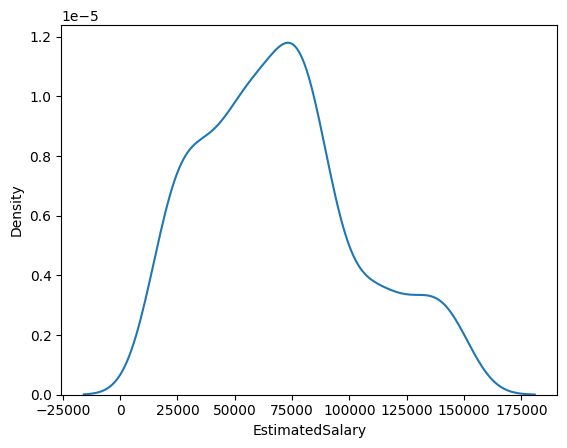

In [10]:
sns.kdeplot(df["EstimatedSalary"])

In [11]:
df.sample(2)

,Age,EstimatedSalary,Purchased
209,46,22000,0
388,47,34000,1


In [14]:
X = df.iloc[:,0:2]
print(X.sample(1))
y = df.iloc[:,-1:]
print(y.sample(1))

     Age  EstimatedSalary
290   39           134000
     Purchased
370          1


In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3 , random_state=0)

In [17]:
print(X_test.sample(1))
print(y_test.sample(1))
print(X_train.sample(1))
print(y_train.sample(1))

    Age  EstimatedSalary
76   18            52000
     Purchased
390          1
    Age  EstimatedSalary
18   46            28000
     Purchased
377          0


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [21]:
import numpy as np
np.round(X_train.describe() , 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [25]:
X_train_scaled

array([[0.19047619, 0.        ],
       [1.        , 0.64444444],
       [0.47619048, 0.71851852],
       [0.52380952, 0.68148148],
       [0.57142857, 0.28148148],
       [0.4047619 , 0.32592593],
       [0.71428571, 0.19259259],
       [0.71428571, 0.88148148],
       [0.47619048, 0.72592593],
       [0.26190476, 0.98518519],
       [0.19047619, 0.        ],
       [1.        , 0.2       ],
       [0.14285714, 0.02962963],
       [0.57142857, 0.99259259],
       [0.66666667, 0.6       ],
       [0.23809524, 0.32592593],
       [0.5       , 0.6       ],
       [0.23809524, 0.54814815],
       [0.54761905, 0.42222222],
       [0.64285714, 0.08148148],
       [0.35714286, 0.4       ],
       [0.04761905, 0.4962963 ],
       [0.30952381, 0.43703704],
       [0.57142857, 0.48148148],
       [0.4047619 , 0.42222222],
       [0.35714286, 0.99259259],
       [0.52380952, 0.41481481],
       [0.78571429, 0.97037037],
       [0.66666667, 0.47407407],
       [0.4047619 , 0.44444444],
       [0.

In [26]:
X_train_Scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_Scaled=pd.DataFrame(X_test_scaler,columns=X_test.columns)

In [31]:
np.round(X_train_Scaled.describe(),1) # Minimum value = 0 && Maximum value =1

,Age,EstimatedSalary
count,280.0,280.0
mean,0.5,0.4
std,0.2,0.3
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.7,0.5
max,1.0,1.0


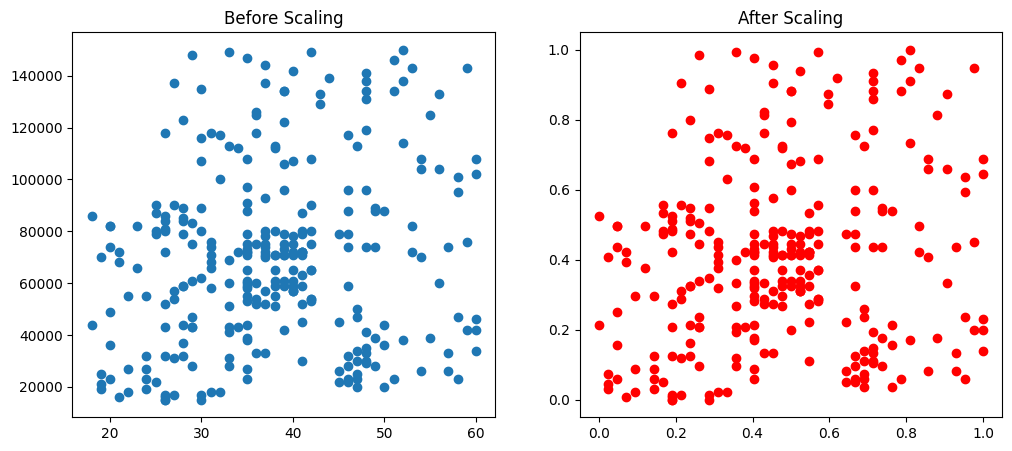

In [32]:
from matplotlib import pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_Scaled['Age'], X_train_Scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()